## Gaslight

This example produces a plot in which two quantities are varied. Typically one quantity would be the metallicity. This requires defining a default grid point.

In [40]:

from copy import copy, deepcopy
from gaslight.grid import Grid
import numpy as np
import matplotlib.pyplot as plt
from gaslight.grid import Grid
from synthesizer.line import get_diagram_labels
from synthesizer.line_ratios import (
    get_bpt_kewley01,
    get_bpt_kauffman03,
    line_labels)
import cmasher as cmr

# set style
# plt.style.use('../matplotlibrc.txt')

In [41]:

grid_name = 'qsosed-isotropic-limited-c23.01-agn-test'
default_parameters = {
    'mass': 1E8,
    'accretion_rate_eddington': 1.00,
    'metallicity': 0.01,
    'ionisation_parameter': 0.01,
    'hydrogen_density': 1000.,
    'stop_column_density': 22.,
}

grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0-ages:6.,7.,8.-c23.01-full'
# grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0-c23.01-full' # not run yet
default_parameters = {
    'log10age': 6.,
    'metallicity': 0.01,
    'ionisation_parameter': 0.01,
    'hydrogen_density': 1000.,
    'alpha': 0.,
    'abundance_scalings.nitrogen_to_oxygen': -1.03,
    'abundance_scalings.carbon_to_oxygen': -0.34,
    'depletion_scale': 0.5
}

In [42]:


grid_dir = '/Users/sw376/Dropbox/Research/data/gaslight/grids'
grid = Grid(grid_dir=grid_dir, grid_name=grid_name)
print(grid)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/sw376/Dropbox/Research/data/gaslight/grids/bpass-2.2.1-bin_chabrier03-0.1,300.0-c23.01-full.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# the first axis which is fixed, all other axes are varied 
fixed_axis = 'metallicity'

variable_axes = deepcopy(grid.axes)
variable_axes.remove('metallicity')

print(variable_axes)
print(grid.axes)



['log10age', 'alpha', 'abundance_scalings.nitrogen_to_oxygen', 'abundance_scalings.carbon_to_oxygen', 'depletion_scale', 'ionisation_parameter', 'hydrogen_density']
['log10age', 'metallicity', 'alpha', 'abundance_scalings.nitrogen_to_oxygen', 'abundance_scalings.carbon_to_oxygen', 'depletion_scale', 'ionisation_parameter', 'hydrogen_density']


In [ ]:
# a dictionary of colour-maps to use. Using a dictionary ensures consistency between different grids.
axis_colour_maps = {
    'mass': 'cmr.ember',
    'accretion_rate_eddington': 'cmr.ember',
    'cosine_inclination': 'cmr.ember',
    'hydrogen_density': 'cmr.ember',
    'ionisation_parameter': 'cmr.cosmic',
    'log10age': 'cmr.lavender',
    'abundance_scalings.nitrogen_to_oxygen': 'cmr.bubblegum',
    'abundance_scalings.carbon_to_oxygen': 'cmr.bubblegum',
    'hydrogen_density': 'cmr.ember',
    'depletion_scale': 'cmr.guppy',
    'alpha': 'cmr.amethyst',
    'ionisation_parameter': 'cmr.cosmic',
    'stop_column_density': 'cmr.cosmic',
}


In [ ]:


default_grid_point = grid.get_nearest_grid_point(default_parameters)

print(default_grid_point)

(0, 8, 1, 2, 2, 2, 2, 2)


In [ ]:
# ratios
# ratios are all plotted on the same figure
ratios = ['R3', 'R2', 'R23', 'S2', "O32", "Ne3O2"]

# metallicity limits on the ratio diagram
metallicity_limits = np.array([0.00002, 0.04])

# diagrams
# one figure is made per diagram
diagrams = ['BPT-NII', 'OHNO']
diagrams = ['BPT-NII']


## make ratios

log10age [6. 7. 8.]


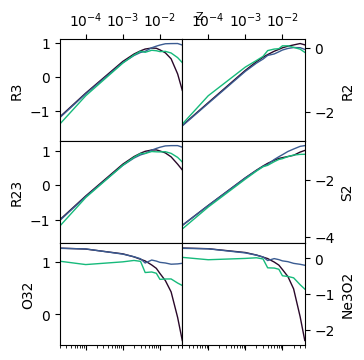

alpha [-0.25  0.    0.5   1.  ]


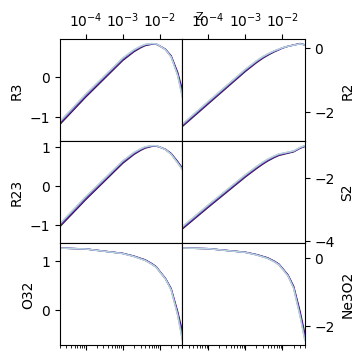

abundance_scalings.nitrogen_to_oxygen [-2.   -1.5  -1.03 -0.5 ]


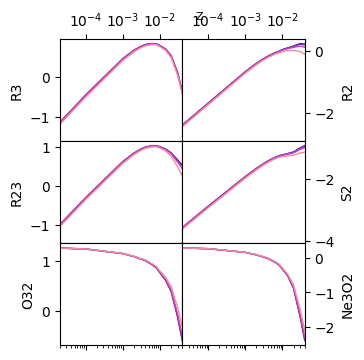

abundance_scalings.carbon_to_oxygen [-1.5  -1.   -0.34  0.  ]


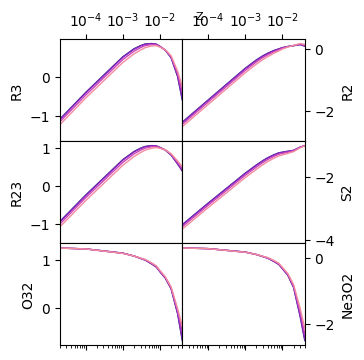

depletion_scale [0.   0.25 0.5  0.75 1.  ]


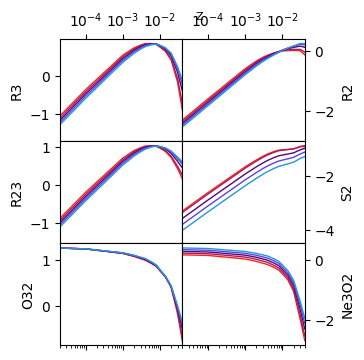

ionisation_parameter [0.0001 0.001  0.01   0.1   ]


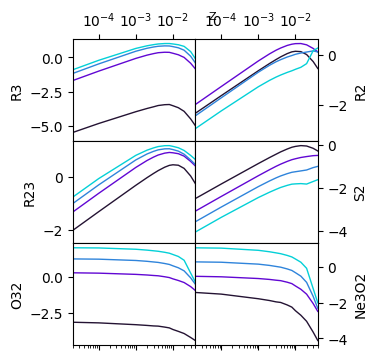

hydrogen_density [1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


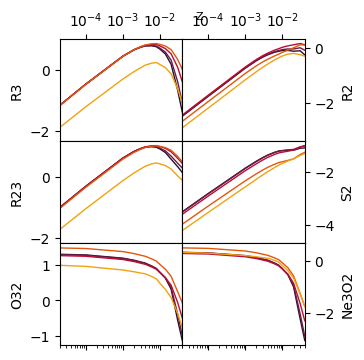

In [ ]:


for variable_parameter in variable_axes:

    # get cmap_name from dictionary above
    cmap_name = axis_colour_maps[variable_parameter]

    # define sub-cmap to ignore extremes
    cmap = cmr.get_sub_cmap(cmap_name, 0.1, 0.9)

    # get the variable parameters
    variable_parameter_values = grid.axes_values[variable_parameter]
    print(variable_parameter, variable_parameter_values)

    # get colours
    colours = cmr.take_cmap_colors(
        cmap_name,
        len(variable_parameter_values),
        cmap_range=(0.15, 0.85))


    # define the number of rows using the number of ratios 
    nrows = int(np.ceil(len(ratios)/2.))

    fig = plt.figure(figsize=(3.5, 3.5))
    gs = fig.add_gridspec(nrows, 2,
                        hspace=0,
                        wspace=0, 
                        left=0.15,
                        right=0.85, 
                        bottom=0.025,
                        top=0.9,
                        )
    axes = gs.subplots()

    for ratio_id, ax in zip(ratios, axes.flatten()):

        for iv, (v, c) in enumerate(zip(variable_parameter_values, colours)):

            ratio = []

            parameters = default_parameters | {variable_parameter: v}

            for iz, metallicity in enumerate(grid.metallicity):

                grid_value_dict = parameters | {'metallicity': metallicity}

                grid_point = grid.get_nearest_grid_point(grid_value_dict)

                lines = grid.get_line_collection(grid_point)

                ratio.append(np.log10(lines.get_ratio(ratio_id)))

            ax.plot(
                grid.metallicity,
                ratio,
                lw=1,
                c=c,
                ls='-',
                zorder=2)

    for ax, ratio_id in zip(axes.flatten(), ratios):

        ax.set_ylabel(ratio_id)
        # ax.axhline(0.0, c='k', alpha=0.2, lw=4)
        ax.set_xlim(metallicity_limits)
        # ax.set_ylim([-0.99, 0.99])
        ax.set_xscale('log')

    for ax in axes[-1, :]:
        ax.set_xticklabels([])

    for ax in axes[0, :]:
        ax.tick_params(top=True, labeltop=True)

    for ax in axes[:, 1]:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
        # ax.set_yticklabels([])

    fig.supxlabel(r'$\rm Z$', x=0.55, y=0.95, fontsize=8)

    plt.show()
    # fig.savefig(f'figs/{grid_type}-ratios-{parameter}.pdf')
    fig.clf()



log10age [6. 7. 8.]


/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_17764/3796610456.py:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_, y_, s=5, c=c, marker='o')


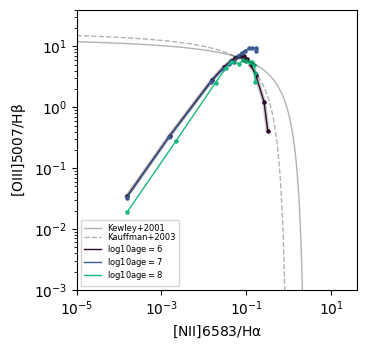

alpha [-0.25  0.    0.5   1.  ]


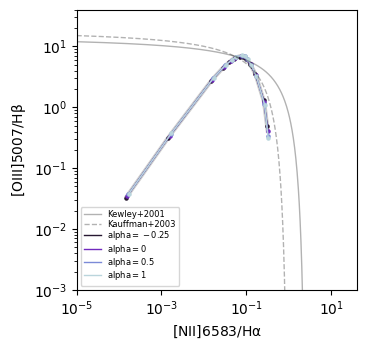

abundance_scalings.nitrogen_to_oxygen [-2.   -1.5  -1.03 -0.5 ]


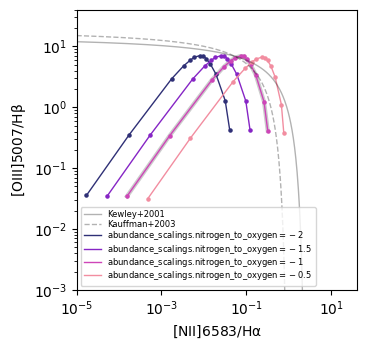

abundance_scalings.carbon_to_oxygen [-1.5  -1.   -0.34  0.  ]


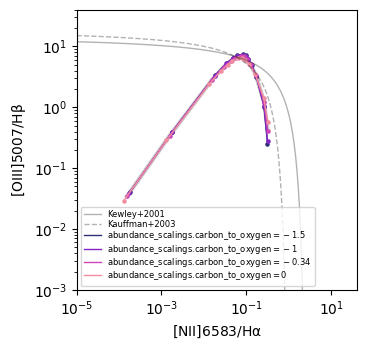

depletion_scale [0.   0.25 0.5  0.75 1.  ]


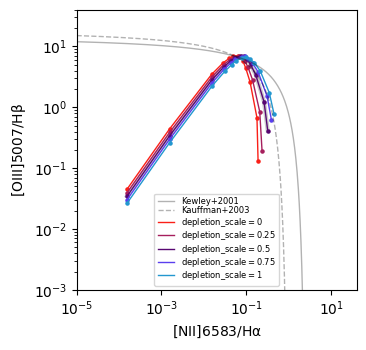

ionisation_parameter [0.0001 0.001  0.01   0.1   ]


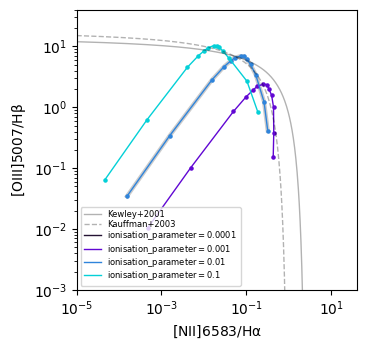

hydrogen_density [1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


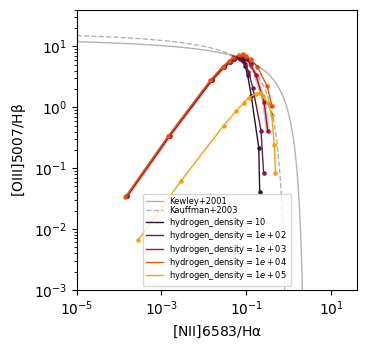

In [ ]:

for variable_parameter in variable_axes:

    # get cmap_name from dictionary above
    cmap_name = axis_colour_maps[variable_parameter]

    # define sub-cmap to ignore extremes
    cmap = cmr.get_sub_cmap(cmap_name, 0.1, 0.9)

    # get the variable parameters
    variable_parameter_values = grid.axes_values[variable_parameter]
    print(variable_parameter, variable_parameter_values)

    # get colours
    colours = cmr.take_cmap_colors(
        cmap_name,
        len(variable_parameter_values),
        cmap_range=(0.15, 0.85))


    for diagram_id in diagrams:

        fig = plt.figure(figsize=(3.5, 3.5))

        bottom = 0.15
        height = 0.8
        left = 0.15
        width = 0.8

        ax = fig.add_axes((left, bottom, width, height))

        if diagram_id == 'BPT-NII':
            # plot Kewley and Kauffmann lines if BPT
            for f, ls, limit, label in zip([get_bpt_kewley01, get_bpt_kauffman03],
                                        ['-', '--'],
                                        [0.47, 0.05],
                                        ['Kewley+2001', 'Kauffman+2003']):
                log10x = np.arange(-5., limit, 0.01)
                ax.plot(10**log10x, 10**f(log10x), ls=ls, lw=1, c='k', alpha=0.3, label=label)

        # plot default line diagram
        x = []
        y = []

        for iz, metallicity in enumerate(grid.metallicity):

            parameters = default_parameters | {'metallicity': metallicity}
            grid_point = grid.get_nearest_grid_point(parameters)
            lines = grid.get_line_collection(grid_point)
            x_, y_ = lines.get_diagram(diagram_id)

            x.append(x_)
            y.append(y_)

        ax.plot(x, y, lw=3, c='k', alpha=0.2, zorder=1)

        # plot other models
        for iv, (v, c) in enumerate(zip(variable_parameter_values, colours)):

            x = []
            y = []

            for iz, metallicity in enumerate(grid.metallicity):

                parameters = default_parameters | {variable_parameter: v} | {'metallicity': metallicity}

                grid_point = grid.get_nearest_grid_point(parameters)
                lines = grid.get_line_collection(grid_point)
                x_, y_ = lines.get_diagram(diagram_id)
                x.append(x_)
                y.append(y_)
                ax.scatter(x_, y_, s=5, c=c, marker='o')

            label = rf'{variable_parameter}$={v:.2g}$'

            ax.plot(x, y, ls='-', c=c, alpha=1.0, zorder=1, lw=1, label=label)


        # constant metallicity
        for iz, metallicity in enumerate(grid.metallicity):
        
            x = []
            y = []

            for iv, (v, c) in enumerate(zip(variable_parameter_values, colours)):

                parameters = default_parameters | {variable_parameter: v} | {'metallicity': metallicity}
                lines = grid.get_line_collection(grid_point)
                x_, y_ = lines.get_diagram(diagram_id)
                x.append(x_)
                y.append(y_)
                
            ax.plot(x, y, ls='-', c='k', alpha=0.1, zorder=1, lw=1)

        ax.legend(fontsize=6, labelspacing=0.05)

        ax.set_xlim([0.00001, 40])
        ax.set_ylim([0.001, 40])
        ax.set_xscale('log')
        ax.set_yscale('log')

        xlabel, ylabel = get_diagram_labels(diagram_id)

        ax.set_xlabel(rf'$\rm {xlabel}$')
        ax.set_ylabel(rf'$\rm {ylabel}$')

        # fig.savefig(f'figs/{grid_type}-{diagram_id}-{parameter}.pdf')
        plt.show()
        fig.clf()